In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.tree import export_graphviz
from graphviz import Source

from sklearn.pipeline import Pipeline, make_pipeline

import pandas_profiling

In [20]:
pokemon = pd.read_csv('./pokemon_preprocessed.csv')
pokemon.head()

,#_x,First_pokemon,Second_pokemon,Winner,Winner_mark,Type 1_first,Type 2_first,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Generation_first,Legendary_first,#_y,Type 1_second,Type 2_second,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second,Generation_second,Legendary_second
0,266,266,298,298,2,15,10,50,64,50,45,50,41,2,0,298,9,1,70,70,40,60,40,60,3,0
1,702,702,701,701,2,9,5,91,90,72,90,129,108,5,1,701,15,5,91,129,90,72,90,108,5,1
2,191,191,668,668,2,4,7,55,40,85,80,105,40,2,0,668,14,12,75,75,75,125,95,40,5,0
3,237,237,683,683,2,6,12,40,40,40,70,40,20,2,0,683,2,12,77,120,90,60,90,48,5,0
4,151,151,231,151,1,15,18,70,60,125,115,70,55,1,0,231,0,16,20,10,230,10,230,5,2,0


In [21]:
pokemon.columns

Index(['#_x', 'First_pokemon', 'Second_pokemon', 'Winner', 'Winner_mark',
       'Type 1_first', 'Type 2_first', 'HP_first', 'Attack_first',
       'Defense_first', 'Sp. Atk_first', 'Sp. Def_first', 'Speed_first',
       'Generation_first', 'Legendary_first', '#_y', 'Type 1_second',
       'Type 2_second', 'HP_second', 'Attack_second', 'Defense_second',
       'Sp. Atk_second', 'Sp. Def_second', 'Speed_second', 'Generation_second',
       'Legendary_second'],
      dtype='object')

In [22]:
def pair_graph(col_name, df):
    plt.figure( figsize =(10,7) )
#     ff.create_distplot(df[df['Winner_mark']==1][col_name])
    sns.distplot( df[df['Winner_mark']==1][col_name], color="skyblue", label="First win",hist = False, kde = True)
    sns.distplot( df[df['Winner_mark']==2][col_name] , color="red", label="Second win",hist = False, kde = True)
    plt.show()



In [23]:
pokemon[pokemon['Winner_mark']==1]['HP_first']

4         70
5         50
11        91
13        70
14       100
        ... 
49993     38
49995    100
49996     60
49998     40
49999     78
Name: HP_first, Length: 23601, dtype: int64

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


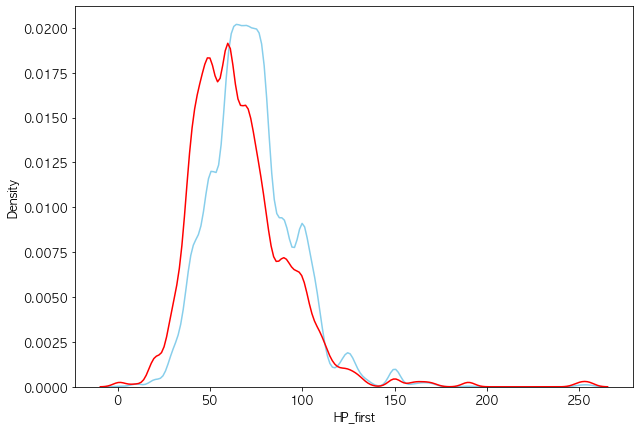

In [24]:
pair_graph('HP_first',pokemon)

In [27]:
cols = pokemon.columns
cols

Index(['#_x', 'First_pokemon', 'Second_pokemon', 'Winner', 'Winner_mark',
       'Type 1_first', 'Type 2_first', 'HP_first', 'Attack_first',
       'Defense_first', 'Sp. Atk_first', 'Sp. Def_first', 'Speed_first',
       'Generation_first', 'Legendary_first', '#_y', 'Type 1_second',
       'Type 2_second', 'HP_second', 'Attack_second', 'Defense_second',
       'Sp. Atk_second', 'Sp. Def_second', 'Speed_second', 'Generation_second',
       'Legendary_second'],
      dtype='object')

In [28]:
cols.drop(['Winner'])
cols

Index(['#_x', 'First_pokemon', 'Second_pokemon', 'Winner', 'Winner_mark',
       'Type 1_first', 'Type 2_first', 'HP_first', 'Attack_first',
       'Defense_first', 'Sp. Atk_first', 'Sp. Def_first', 'Speed_first',
       'Generation_first', 'Legendary_first', '#_y', 'Type 1_second',
       'Type 2_second', 'HP_second', 'Attack_second', 'Defense_second',
       'Sp. Atk_second', 'Sp. Def_second', 'Speed_second', 'Generation_second',
       'Legendary_second'],
      dtype='object')

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


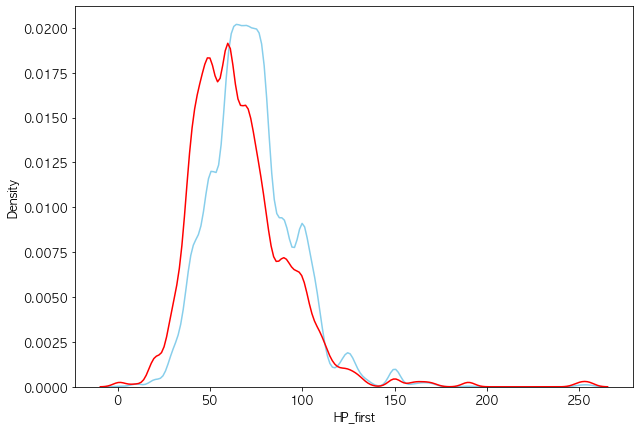

In [18]:
pair_graph('HP_first',pokemon)

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


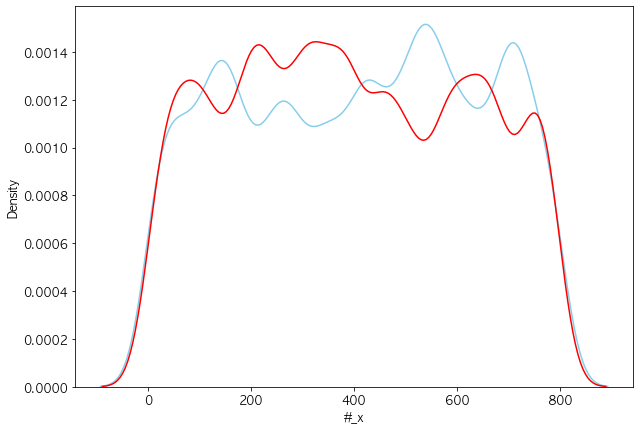

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


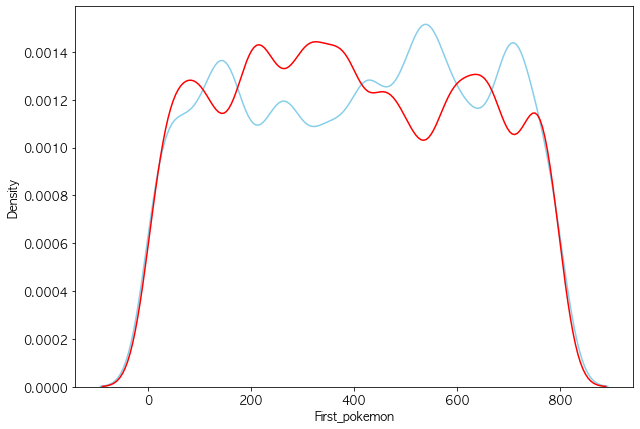

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


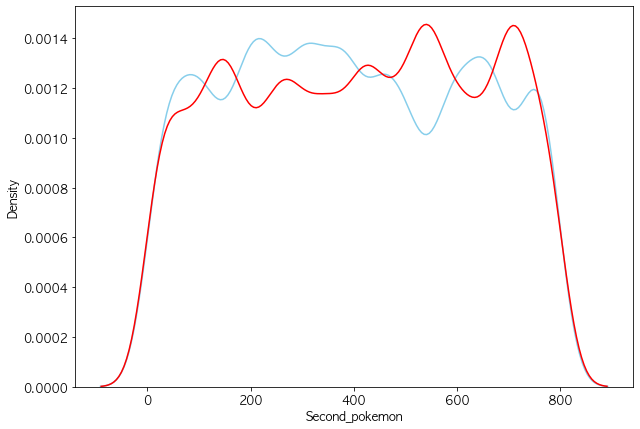

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


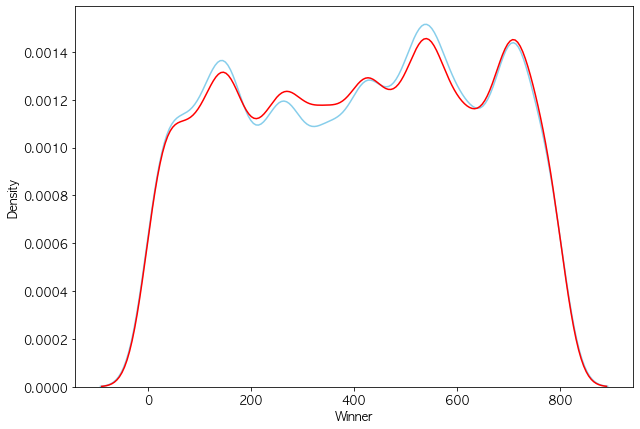

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:3

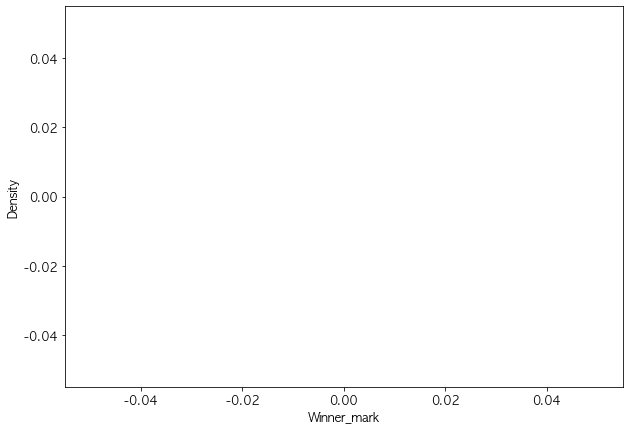

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


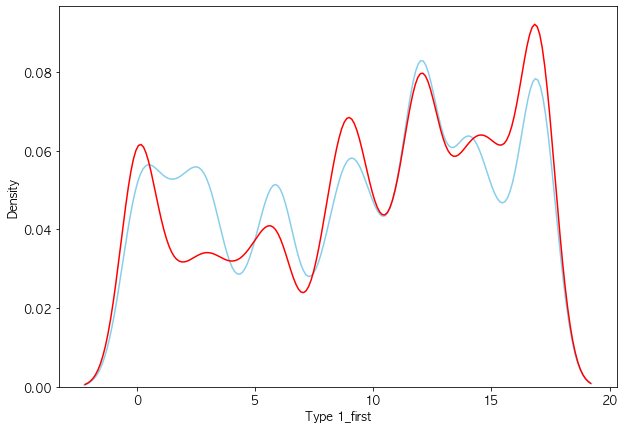

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


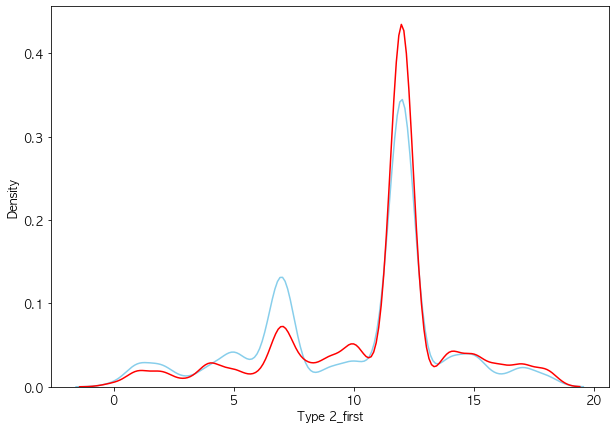

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


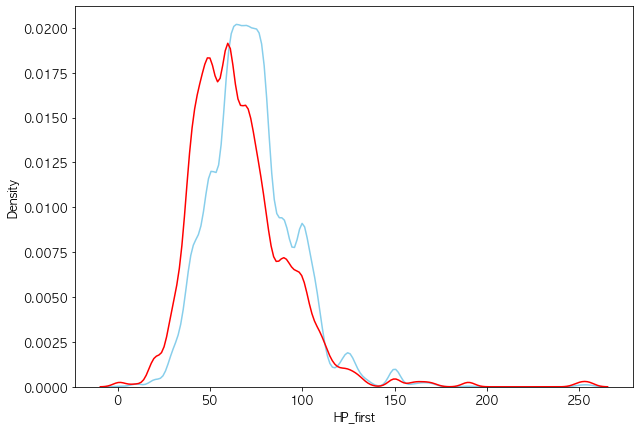

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


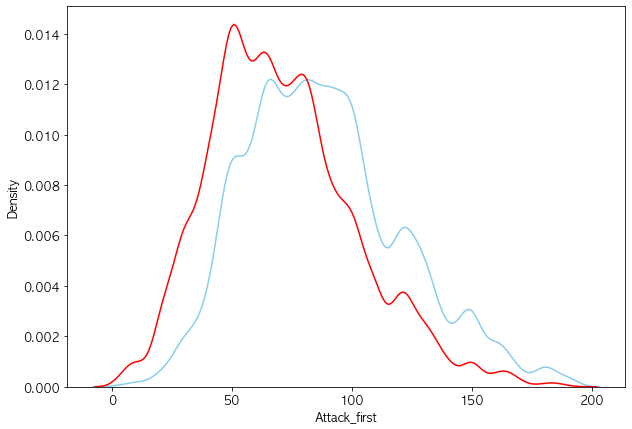

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


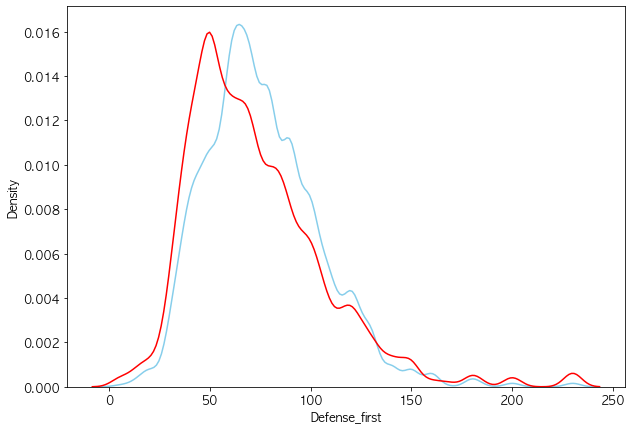

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


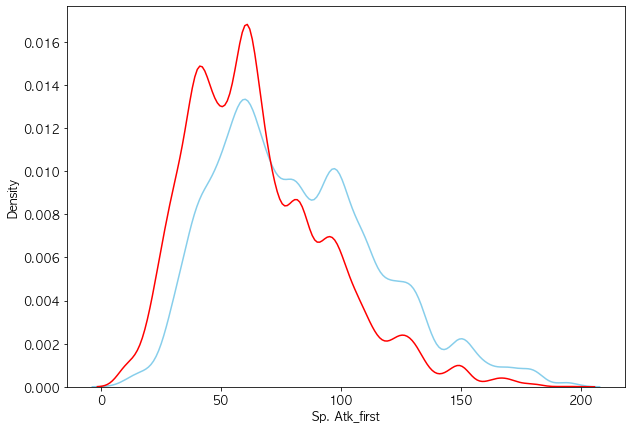

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


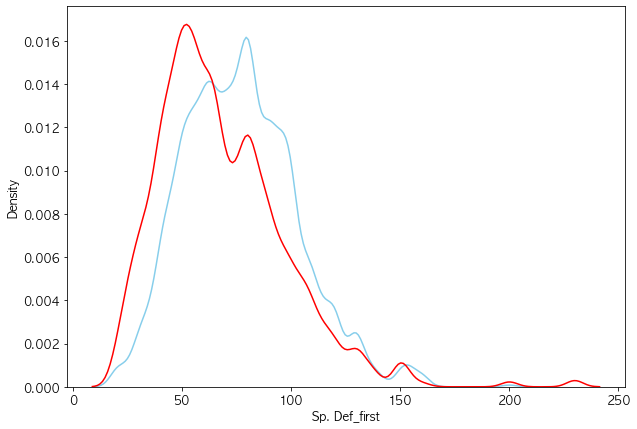

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


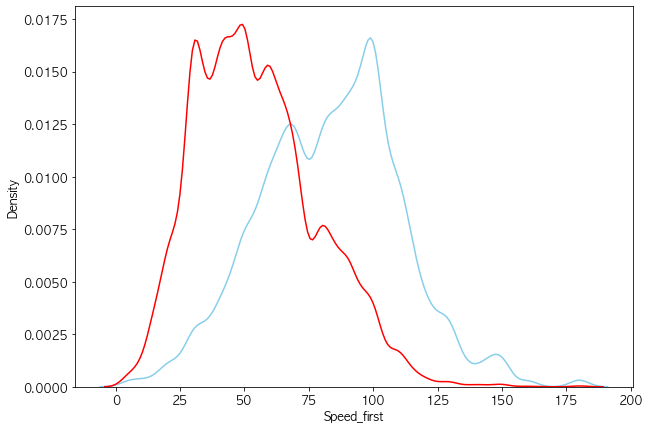

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


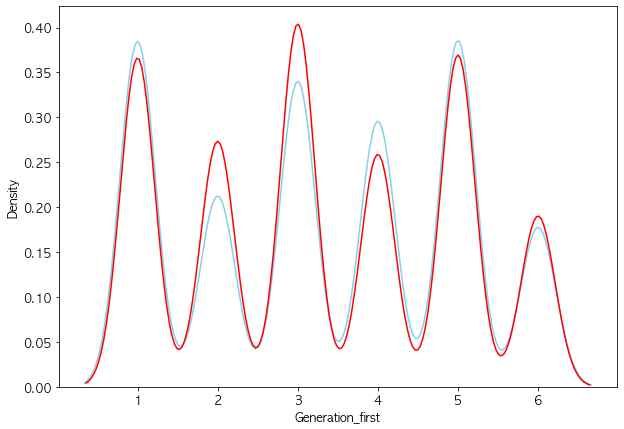

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


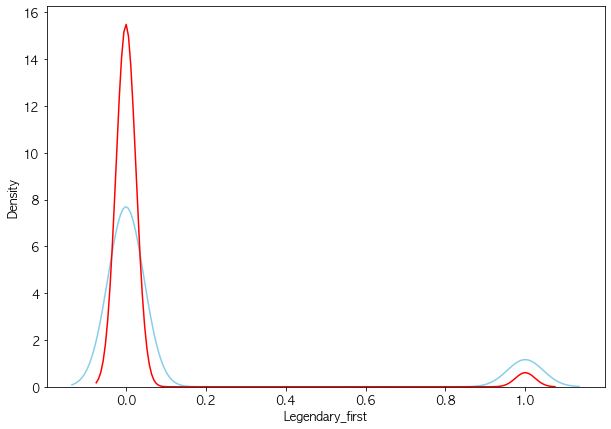

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


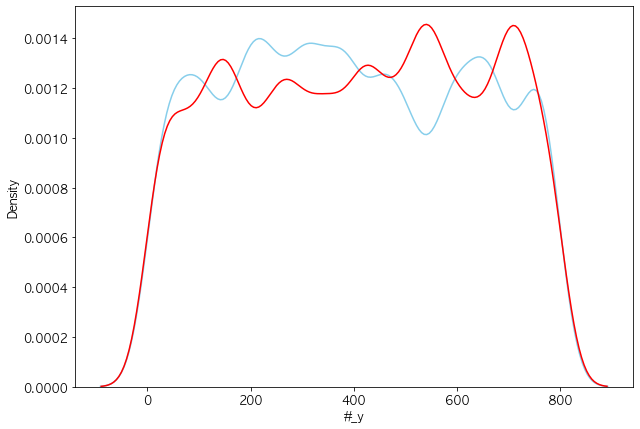

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


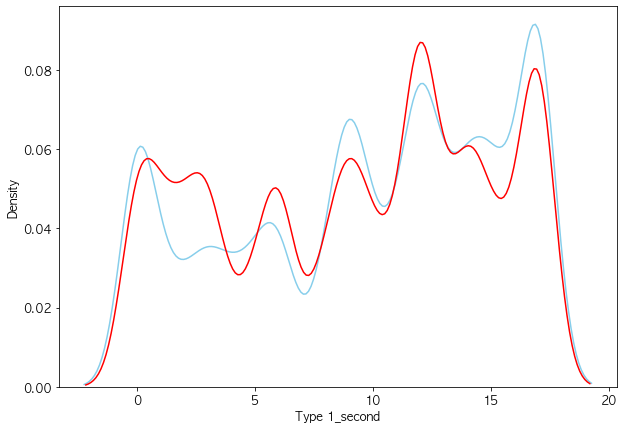

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


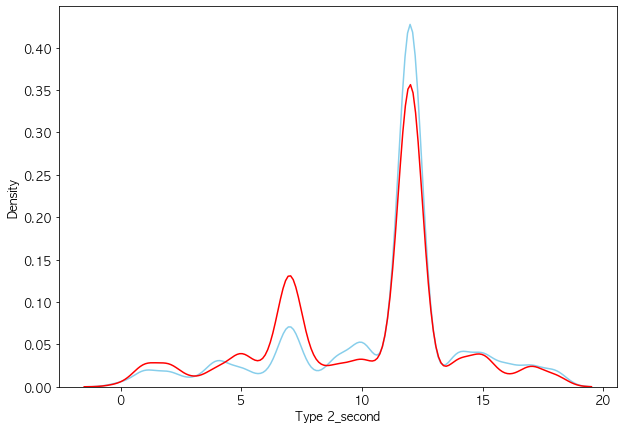

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


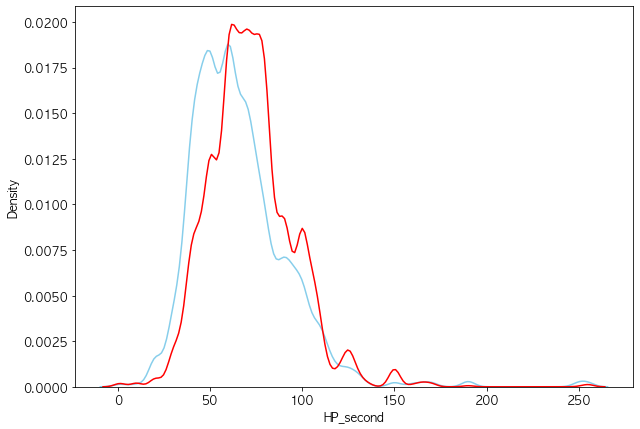

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


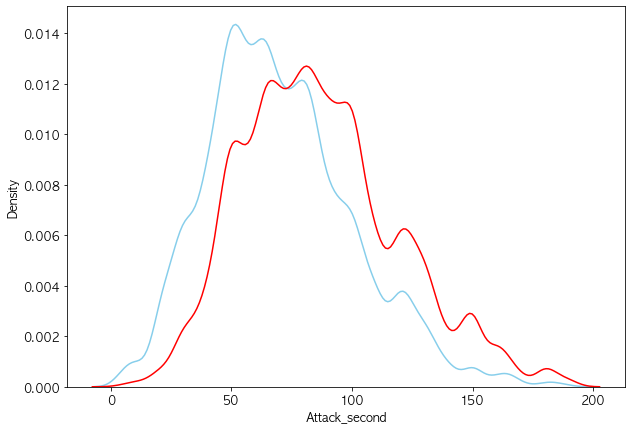

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


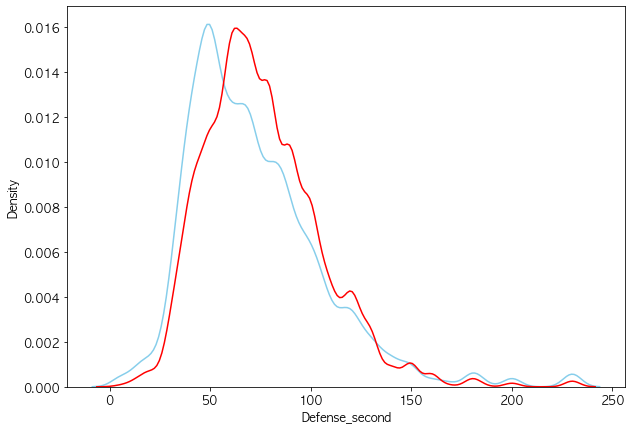

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


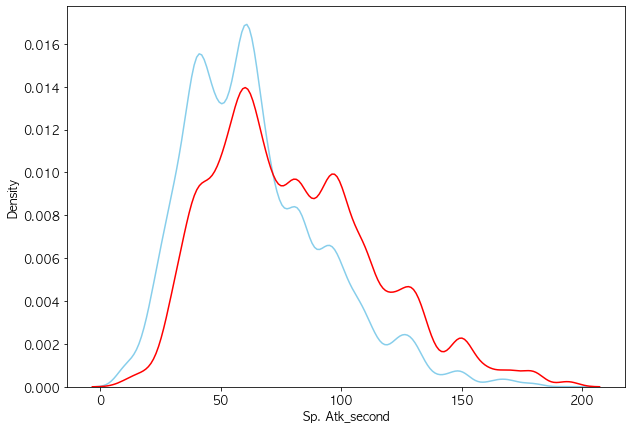

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


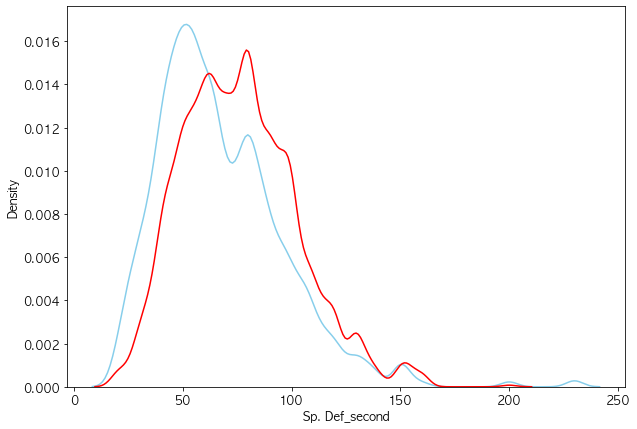

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


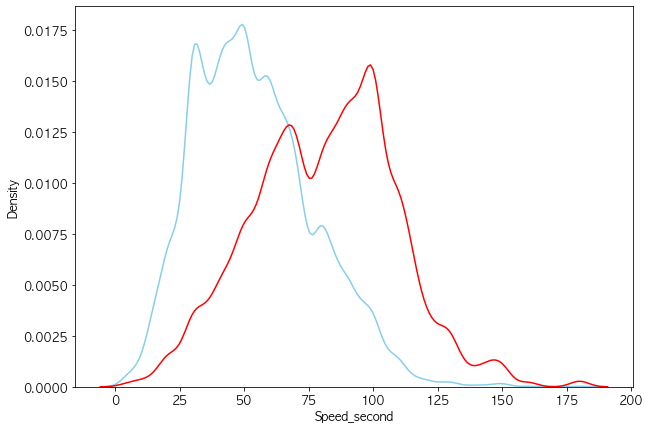

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


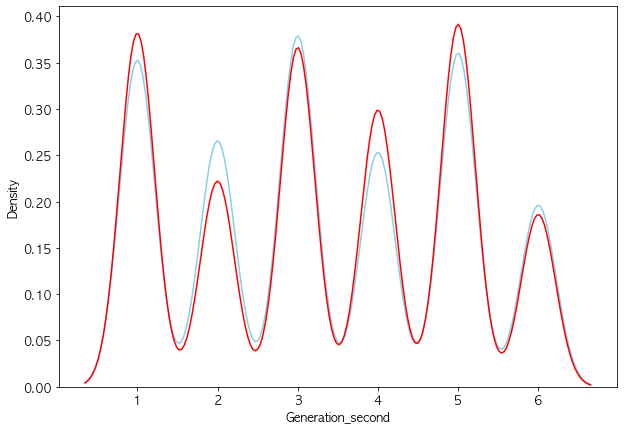

/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


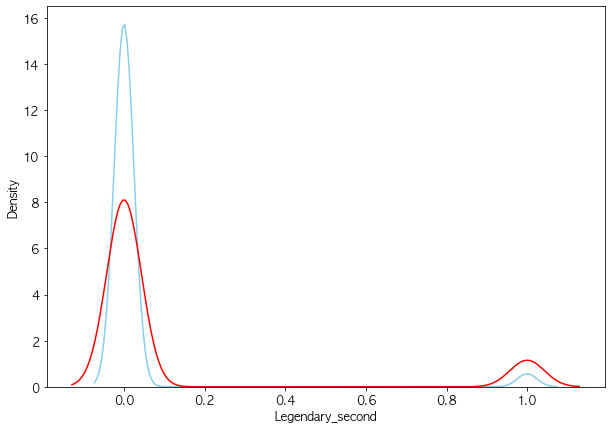

In [29]:
for i in cols:
    pair_graph(i,pokemon)

In [41]:
pokemon['Winner_mark'].value_counts(dropna=False)

2    26399
1    23601
Name: Winner_mark, dtype: int64

No handles with labels found to put in legend.


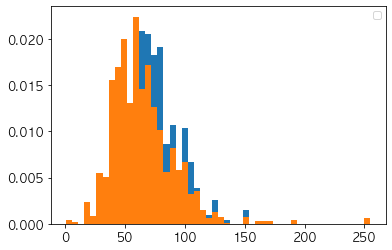

In [45]:
fig, axes = plt.subplots(1, 1)

# bins = np.linspace(pokemon['HP_first'].min(),
#                    1250,
#                    50)

plt.hist(pokemon.loc[(pokemon['Winner_mark'] == 1) , 'HP_first'], bins=50, density=True)
plt.hist(pokemon.loc[(pokemon['Winner_mark'] == 2) , 'HP_first'], bins=50,  density=True)
plt.legend(loc='upper right')
plt.show()

In [47]:
pokemon.head()

,#_x,First_pokemon,Second_pokemon,Winner,Winner_mark,Type 1_first,Type 2_first,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Generation_first,Legendary_first,#_y,Type 1_second,Type 2_second,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second,Generation_second,Legendary_second
0,266,266,298,298,2,15,10,50,64,50,45,50,41,2,0,298,9,1,70,70,40,60,40,60,3,0
1,702,702,701,701,2,9,5,91,90,72,90,129,108,5,1,701,15,5,91,129,90,72,90,108,5,1
2,191,191,668,668,2,4,7,55,40,85,80,105,40,2,0,668,14,12,75,75,75,125,95,40,5,0
3,237,237,683,683,2,6,12,40,40,40,70,40,20,2,0,683,2,12,77,120,90,60,90,48,5,0
4,151,151,231,151,1,15,18,70,60,125,115,70,55,1,0,231,0,16,20,10,230,10,230,5,2,0


In [46]:
pokemon.columns

Index(['#_x', 'First_pokemon', 'Second_pokemon', 'Winner', 'Winner_mark',
       'Type 1_first', 'Type 2_first', 'HP_first', 'Attack_first',
       'Defense_first', 'Sp. Atk_first', 'Sp. Def_first', 'Speed_first',
       'Generation_first', 'Legendary_first', '#_y', 'Type 1_second',
       'Type 2_second', 'HP_second', 'Attack_second', 'Defense_second',
       'Sp. Atk_second', 'Sp. Def_second', 'Speed_second', 'Generation_second',
       'Legendary_second'],
      dtype='object')

In [81]:
cat_cols = ['#_x', 'First_pokemon', 'Second_pokemon', 
            'Legendary_first', 'Legendary_second', 'Winner_mark']
conti_cols = ['HP_first', 'Attack_first',
              'Defense_first', 'Sp. Atk_first', 'Sp. Def_first', 'Speed_first',
              'Generation_first', 
              'HP_second', 'Attack_second', 'Defense_second',
              'Sp. Atk_second', 'Sp. Def_second', 'Speed_second', 'Generation_second']

y = ['Winner']

## train-test split

In [82]:
X = pokemon[cat_cols + conti_cols]
y = pokemon[y]

In [83]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1)

# train / validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=1)

y_train.shape, y_val.shape, y_test.shape

((28125, 1), (9375, 1), (12500, 1))

## modeling

In [85]:
assert len(X_train.columns) ==len(set(X_train.columns))

##### baseline: rf

In [97]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
pred_train = rf.predict(X_train)
pred_val = rf.predict(X_val)

<ipython-input-97-9c4c7bd98327>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [ ]:
print('trian acc: ', accuracy_score(y_train, pred_train))
print('validation acc:', accuracy_score(y_val, pred_val))

In [98]:
accuracy_score(y_train, pred_train), accuracy_score(y_val, pred_val), 

(1.0, 0.91808)

In [104]:
rf.feature_importances_

array([0.05609992, 0.0574773 , 0.07721312, 0.00308056, 0.00328889,
       0.0422311 , 0.04693125, 0.05330617, 0.04826369, 0.05204655,
       0.04707119, 0.06601897, 0.02599764, 0.05866806, 0.06377444,
       0.05953305, 0.06528249, 0.05973151, 0.07917644, 0.03480766])

##### gridsearch: rf

In [112]:
rf = RandomForestClassifier(random_state=1)

param_grid_rf = {
    'n_estimators':[50,100,150,], # 200,250,300,350,400,450,500
#     'max_depth':[3,5,7], # 9, 11, 13, 15, 17, 19
    #'bootstrap':[True, False],
}

In [113]:
# grid search
grid_search_rf = GridSearchCV(rf, 
                           param_grid = param_grid_rf, 
                           scoring=["accuracy",'recall','precision'], 
                           refit="accuracy", 
                           cv = 5, 
                           n_jobs=-1
                          )

In [114]:
grid_search_rf.fit(X_train, y_train)

/Users/jonghae/venv-tf/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/jonghae/venv-tf/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
/Users/jonghae/venv-tf/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 150]}, refit='accuracy',
             scoring=['accuracy', 'recall', 'precision'])

In [115]:
# predict
pred_train_rf = grid_search_rf.predict(X_train)
pred_val_rf = grid_search_rf.predict(X_val)

In [116]:
accuracy_score(y_train, pred_train_rf), accuracy_score(y_val, pred_val_rf), 

(1.0, 0.9106133333333334)

In [117]:
df_rf = pd.DataFrame(grid_search_rf.cv_results_)
df_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,37.019403,0.667752,11.796507,0.563216,50,{'n_estimators': 50},NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,65.312473,0.518922,14.430312,0.478566,100,{'n_estimators': 100},NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,89.544318,0.439409,9.384495,0.317850,150,{'n_estimators': 150},NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [ ]:
best_params_rf = grid_search_rf.best_params_
best_params_rf

In [ ]:
# best model
best_estimator_rf = grid_search_rf.best_estimator_
best_estimator_rf, type(best_estimator_rf)

##### baseline: XGB

In [123]:
xgb =XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)
pred_train = xgb.predict(X_train)
pred_val = xgb.predict(X_val)
accuracy_score(y_train, pred_train), accuracy_score(y_val, pred_val), 


/Users/jonghae/venv-tf/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[20:38:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.9999288888888889, 0.9681066666666667)

In [ ]:
print('trian acc: ', accuracy_score(y_train, pred_train))
print('validation acc:', accuracy_score(y_val, pred_val))

In [124]:
xgb.feature_importances_

array([0.06396019, 0.        , 0.07235928, 0.06754472, 0.0959864 ,
       0.03080503, 0.04410299, 0.05389638, 0.04261126, 0.05406618,
       0.05022133, 0.06823144, 0.        , 0.04905939, 0.06244023,
       0.04889103, 0.06683128, 0.05444117, 0.07455162, 0.        ],
      dtype=float32)

In [118]:
xgb : XGBClassifier(random_state=1,
                    objective='binary',
                   )

param_grid_xgb = {
    'n_estimators' : [50,100,150], # ,200,250,300,350,400,450,500
#     'max_depth':[3,5,7,9,11,14,17,20],
#     'learning_rate' : [0.01,0.05,0.1,],
#     'subsample' : [0.5,0.6,0.9],
#     'colsample_bytree':[0.5,0.6,0.9]
}

In [119]:
# grid search
grid_search_xgb = GridSearchCV(xgb, 
                           param_grid = param_grid_xgb, 
                           scoring=["accuracy",'recall','precision'], 
                           refit="accuracy", 
                           cv = 10, 
                           n_jobs=-1
                          )

In [120]:
# fit
grid_search_xgb.fit(X_train, y_train)

/Users/jonghae/venv-tf/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


KeyboardInterrupt: 

In [ ]:
# predict
pred_train_xgb = grid_search_xgb.predict(X_train)
pred_val_xgb = grid_search_xgb.predict(X_val)

In [ ]:
accuracy_score(y_train, pred_train_xgb), accuracy_score(y_val, pred_val_xgb), 

In [ ]:
df_xgb = pd.DataFrame(grid_search_xgb.cv_results_)
df_xgb

In [ ]:
# best param
best_params_xgb = grid_search_xgb.best_params_
best_params_xgb

In [ ]:
# best model
best_estimator_xgb = grid_search_xgb.best_estimator_
best_estimator_xgb, type(best_estimator_xgb)

## pipeline

#### rf-pipeline

In [127]:
pipeline_rf = make_pipeline(StandardScaler(), XGBClassifier())
pipeline_rf.steps

[('standardscaler', StandardScaler()),
 ('xgbclassifier',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None))]

In [128]:
pipeline_rf.fit(X_train, y_train)

/Users/jonghae/venv-tf/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[20:47:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [132]:
print('trian acc: ', accuracy_score(y_train, pipeline_rf.predict(X_train)))
print('validation acc:', accuracy_score(y_val, pipeline_rf.predict(X_val)))

trian acc:  0.9999288888888889
validation acc: 0.9681066666666667


#### xgb-pipeline

In [133]:
pipeline_xgb = make_pipeline(StandardScaler(), XGBClassifier())
pipeline_xgb.steps

[('standardscaler', StandardScaler()),
 ('xgbclassifier',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None))]

In [134]:
pipeline_xgb.fit(X_train, y_train)

/Users/jonghae/venv-tf/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jonghae/venv-tf/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[20:53:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [135]:
print('trian acc: ', accuracy_score(y_train, pipeline_xgb.predict(X_train)))
print('validation acc:', accuracy_score(y_val, pipeline_xgb.predict(X_val)))

trian acc:  0.9999288888888889
validation acc: 0.9681066666666667


#### lgbm-pipeline

In [136]:
pipeline_lgbm = make_pipeline(StandardScaler(), LGBMClassifier())
pipeline_lgbm.steps

[('standardscaler', StandardScaler()), ('lgbmclassifier', LGBMClassifier())]

In [137]:
pipeline_lgbm.fit(X_train, y_train)

/Users/jonghae/venv-tf/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmclassifier', LGBMClassifier())])

In [138]:
print('trian acc: ', accuracy_score(y_train, pipeline_lgbm.predict(X_train)))
print('validation acc:', accuracy_score(y_val, pipeline_lgbm.predict(X_val)))

trian acc:  0.003982222222222222
validation acc: 0.00352
